In [46]:
import os
import numpy as np
import pandas as pd

np.random.seed(36)

# 使用matplotlib库画图
import matplotlib
import seaborn
import matplotlib.pyplot as plot

from sklearn import datasets

housing = pd.read_csv('kc_train.csv', header=-1)
target = pd.read_csv('kc_train2.csv', header=-1)  # 销售价格
t = pd.read_csv('kc_test.csv', header=-1)  # 测试数据

In [47]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
0     10000 non-null int64
1     10000 non-null int64
2     10000 non-null float64
3     10000 non-null int64
4     10000 non-null int64
5     10000 non-null float64
6     10000 non-null int64
7     10000 non-null int64
8     10000 non-null int64
9     10000 non-null int64
10    10000 non-null int64
11    10000 non-null float64
12    10000 non-null float64
dtypes: float64(4), int64(9)
memory usage: 1015.7 KB


In [48]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(housing)  # 进行内部拟合，内部参数会发生变化
scaler_housing = minmax_scaler.transform(housing)
scaler_housing = pd.DataFrame(scaler_housing, columns=housing.columns)

In [49]:
mm = MinMaxScaler()
mm.fit(t)
scaler_t = mm.transform(t)
scaler_t = pd.DataFrame(scaler_t, columns=t.columns)

In [50]:
from sklearn.linear_model import LinearRegression

LR_reg = LinearRegression()
# 进行拟合
LR_reg.fit(scaler_housing, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
from sklearn.metrics import mean_squared_error

preds = LR_reg.predict(scaler_housing)  # 输入数据进行预测得到结果
mse = mean_squared_error(preds, target)

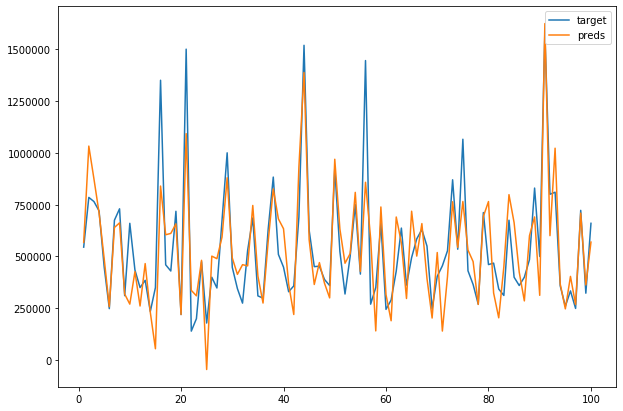

In [52]:
plot.figure(figsize=(10, 7))  # 画布大小
num = 100
x = np.arange(1, num + 1)  # 取100个点进行比较
plot.plot(x, target[:num], label='target')  # 目标取值
plot.plot(x, preds[:num], label='preds')  # 预测取值
plot.legend(loc='upper right')  # 线条显示位置
plot.show()

In [55]:
result = LR_reg.predict(scaler_t)
df_result = pd.DataFrame(result)
df_result.to_csv("result.csv")
